In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split as tr_te_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import LogisticRegression as LogitReg
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
pd.options.display.max_rows = 70

In [2]:
df1 = pd.read_csv("2018_lar_10.csv", delimiter = ",", dtype = {"activity_year": "object", "action_taken":"object", "preapproval":"object", "loan_type":"object", "loan_purpose":"object","hoepa_status  ":"object","activity_year":"object"} )

c:\users\27161\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_2019 = pd.read_csv("2019_lar_sample.csv", delimiter = ",", dtype = {"activity_year": "object", "action_taken":"object", "preapproval":"object", "loan_type":"object", "loan_purpose":"object","hoepa_status  ":"object","activity_year":"object"} )

In [4]:
df_2019_Selected = df_2019[["derived_ethnicity", "derived_race", "derived_sex", "action_taken",
           "preapproval","loan_type", "loan_purpose", "lien_status", "reverse_mortgage",
           "open_end_line_of_credit", "business_or_commercial_purpose", "combined_loan_to_value_ratio",
           "property_value", "construction_method", "occupancy_type", "total_units",
           "income", "debt_to_income_ratio", "applicant_age", "submission_of_application"
           ]]
df_2019_Selected = df_2019_Selected[df_2019_Selected["action_taken"].isin(("1", "3"))]
df_2019_Selected = df_2019_Selected[df_2019_Selected["derived_ethnicity"] != "Free Form Text Only"]
df_2019_Selected = df_2019_Selected[df_2019_Selected["derived_race"] != "Free Form Text Only"]
df_2019_Selected = df_2019_Selected[df_2019_Selected["derived_sex"] != "Sex Not Available"]
# 5 means Loan Purpose not applicable
df_2019_Selected = df_2019_Selected[df_2019_Selected["loan_purpose"] != "5"]
# 1111 means the feature is not applicable
df_2019_Selected = df_2019_Selected[df_2019_Selected["reverse_mortgage"] != 1111]
df_2019_Selected = df_2019_Selected[df_2019_Selected["open_end_line_of_credit"] != 1111]
df_2019_Selected = df_2019_Selected[df_2019_Selected["business_or_commercial_purpose"] != 1111]
df_2019_Selected = df_2019_Selected[df_2019_Selected["property_value"] != "Exempt"]
df_2019_Selected = df_2019_Selected[df_2019_Selected["construction_method"] != "Free Form Text Only"]
df_2019_Selected = df_2019_Selected[df_2019_Selected["income"] != "Free Form Text Only"]
df_2019_Selected = df_2019_Selected[df_2019_Selected["income"] != "Exempt"]
df_2019_Selected = df_2019_Selected[df_2019_Selected["debt_to_income_ratio"] != "Exempt"]
df_2019_Selected = df_2019_Selected[df_2019_Selected["combined_loan_to_value_ratio"] != "Exempt"]

# 8888, 9999 means age is not applicable
df_2019_Selected = df_2019_Selected[df_2019_Selected["applicant_age"] != '8888']
df_2019_Selected = df_2019_Selected[df_2019_Selected["applicant_age"] != '9999']
df_2019_Selected["lien_status"] = df_2019_Selected["lien_status"].astype(object)
df_2019_Selected["reverse_mortgage"] = df_2019_Selected["reverse_mortgage"].astype(object)
df_2019_Selected["open_end_line_of_credit"] = df_2019_Selected["open_end_line_of_credit"].astype(object)
df_2019_Selected["business_or_commercial_purpose"] = df_2019_Selected["business_or_commercial_purpose"].astype(object)
df_2019_Selected["submission_of_application"] = df_2019_Selected["submission_of_application"].astype(object)
df_2019_Selected["occupancy_type"] = df_2019_Selected["occupancy_type"].astype(object)
df_2019_Selected["construction_method"] = df_2019_Selected["construction_method"].astype(object)
df_2019_Selected["combined_loan_to_value_ratio"] = df_2019_Selected["combined_loan_to_value_ratio"].astype(float)
df_2019_Selected["property_value"] = df_2019_Selected["property_value"].astype(float)

In [5]:
print(df_2019_Selected.isnull().sum())
df_2019_Selected = df_2019_Selected.dropna()
print(df_2019_Selected.isnull().sum())

df_2019_Selected = pd.get_dummies(df_2019_Selected)
print(df_2019_Selected.shape)
df_2019_Selected.head(5)

derived_ethnicity                    0
derived_race                         0
derived_sex                          0
action_taken                         0
preapproval                          0
loan_type                            0
loan_purpose                         0
lien_status                          0
reverse_mortgage                     0
open_end_line_of_credit              0
business_or_commercial_purpose       0
combined_loan_to_value_ratio      7102
property_value                    3315
construction_method                  0
occupancy_type                       0
total_units                          0
income                            4786
debt_to_income_ratio              6368
applicant_age                        0
submission_of_application            0
dtype: int64
derived_ethnicity                 0
derived_race                      0
derived_sex                       0
action_taken                      0
preapproval                       0
loan_type                  

,combined_loan_to_value_ratio,property_value,income,derived_ethnicity_Ethnicity Not Available,derived_ethnicity_Hispanic or Latino,derived_ethnicity_Joint,derived_ethnicity_Not Hispanic or Latino,derived_race_2 or more minority races,derived_race_American Indian or Alaska Native,derived_race_Asian,...,debt_to_income_ratio_>60%,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,submission_of_application_1,submission_of_application_2
0,44.666,365000.0,94.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,97.177,145000.0,40.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,103.860,375000.0,190.0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
9,71.429,245000.0,173.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
13,98.886,145000.0,50.0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [6]:
df1.describe()

,derived_msa_md,purchaser_type,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,interest_only_payment,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percen,ffiec_msa_md_median_family_incom,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_unit
count,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,...,62308.000000,11179.000000,1137.000000,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06,1.513977e+06
mean,3.686637e+04,5.190422e+00,1.145448e+00,3.175461e+01,3.118823e+01,3.148012e+01,2.385288e+05,2.431069e+00,3.210568e+01,3.202766e+01,...,4.114849,4.712497,4.536500,5.542026e+03,3.129112e+01,7.327843e+04,1.105787e+02,1.425663e+03,1.947437e+03,3.491916e+01
std,2.432548e+04,1.632339e+01,3.536408e-01,1.792197e+02,1.780151e+02,1.784931e+02,9.185909e+05,4.978293e-01,1.802280e+02,1.802412e+02,...,2.671033,2.778292,3.527649,3.232787e+03,2.618483e+01,1.934192e+04,4.483326e+01,9.024990e+02,1.129665e+03,1.842974e+01
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,5.000000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,1.974000e+04,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.500000e+04,2.000000e+00,2.000000e+00,2.000000e+00,...,2.000000,3.000000,1.000000,3.723000e+03,1.049000e+01,6.410000e+04,8.500000e+01,8.910000e+02,1.296000e+03,2.100000e+01
50%,3.387400e+04,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.750000e+05,2.000000e+00,2.000000e+00,2.000000e+00,...,3.000000,4.000000,5.000000,5.072000e+03,2.314000e+01,7.350000e+04,1.070000e+02,1.302000e+03,1.788000e+03,3.300000e+01
75%,4.174000e+04,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.850000e+05,3.000000e+00,2.000000e+00,2.000000e+00,...,6.000000,7.000000,7.000000,6.702000e+03,4.603000e+01,8.140000e+04,1.330000e+02,1.793000e+03,2.395000e+03,4.700000e+01
max,9.999900e+04,7.200000e+01,2.000000e+00,1.111000e+03,1.111000e+03,1.111000e+03,3.100050e+08,3.000000e+00,1.111000e+03,1.111000e+03,...,9.000000,9.000000,9.000000,5.381200e+04,1.000000e+02,1.348000e+05,5.070000e+02,1.952900e+04,2.539100e+04,7.600000e+01


In [7]:
df3 = df1[["derived_ethnicity", "derived_race", "derived_sex", "action_taken",
           "preapproval","loan_type", "loan_purpose", "lien_status", "reverse_mortgage",
           "open_end_line_of_credit", "business_or_commercial_purpose", "combined_loan_to_value_ratio",
           "property_value", "construction_method", "occupancy_type", "total_units",
            "income", "debt_to_income_ratio", "applicant_age", "submission_of_application"    
          ]]
print(df3.describe())
print(df3.isnull().sum())

        lien_status  reverse_mortgage  open_end_line_of_credit  \
count  1.513977e+06      1.513977e+06             1.513977e+06   
mean   1.145448e+00      3.175461e+01             3.118823e+01   
std    3.536408e-01      1.792197e+02             1.780151e+02   
min   -1.000000e+00     -1.000000e+00            -1.000000e+00   
25%    1.000000e+00      2.000000e+00             2.000000e+00   
50%    1.000000e+00      2.000000e+00             2.000000e+00   
75%    1.000000e+00      2.000000e+00             2.000000e+00   
max    2.000000e+00      1.111000e+03             1.111000e+03   

       business_or_commercial_purpose  construction_method  occupancy_type  \
count                    1.513977e+06         1.513977e+06    1.513977e+06   
mean                     3.148012e+01         1.035554e+00    1.157173e+00   
std                      1.784931e+02         1.872400e-01    5.128108e-01   
min                     -1.000000e+00        -1.000000e+00   -1.000000e+00   
25%            

In [8]:
df3 = df3[df3["action_taken"].isin(("1", "3"))]
print(df3.describe())
print(df3.isnull().sum())

        lien_status  reverse_mortgage  open_end_line_of_credit  \
count  1.027913e+06      1.027913e+06             1.027913e+06   
mean   1.185068e+00      3.812019e+01             3.761019e+01   
std    3.883531e-01      1.968686e+02             1.960639e+02   
min    1.000000e+00      1.000000e+00             1.000000e+00   
25%    1.000000e+00      2.000000e+00             2.000000e+00   
50%    1.000000e+00      2.000000e+00             2.000000e+00   
75%    1.000000e+00      2.000000e+00             2.000000e+00   
max    2.000000e+00      1.111000e+03             1.111000e+03   

       business_or_commercial_purpose  construction_method  occupancy_type  \
count                    1.027913e+06         1.027913e+06    1.027913e+06   
mean                     3.778321e+01         1.036463e+00    1.168840e+00   
std                      1.960686e+02         1.874398e-01    5.294654e-01   
min                      1.000000e+00         1.000000e+00    1.000000e+00   
25%            

In [9]:
print(df3["derived_ethnicity"].value_counts())
df3 = df3[df3["derived_ethnicity"] != "Free Form Text Only"]
print()
print(df3["derived_ethnicity"].value_counts())
print()
print(df3.shape)



Not Hispanic or Latino     766417
Ethnicity Not Available    143291
Hispanic or Latino          97496
Joint                       20405
Free Form Text Only           304
Name: derived_ethnicity, dtype: int64

Not Hispanic or Latino     766417
Ethnicity Not Available    143291
Hispanic or Latino          97496
Joint                       20405
Name: derived_ethnicity, dtype: int64

(1027609, 20)


In [10]:
print(df3["derived_race"].value_counts())
df3 = df3[df3["derived_race"] != "Free Form Text Only"]
print()
print(df3["derived_race"].value_counts())
print()
print(df3.shape)

White                                        727940
Race Not Available                           143514
Black or African American                     71145
Asian                                         55234
Joint                                         18804
American Indian or Alaska Native               5578
Native Hawaiian or Other Pacific Islander      3416
2 or more minority races                       1767
Free Form Text Only                             211
Name: derived_race, dtype: int64

White                                        727940
Race Not Available                           143514
Black or African American                     71145
Asian                                         55234
Joint                                         18804
American Indian or Alaska Native               5578
Native Hawaiian or Other Pacific Islander      3416
2 or more minority races                       1767
Name: derived_race, dtype: int64

(1027398, 20)


In [11]:
print(df3["derived_sex"].value_counts())
df3 = df3[df3["derived_sex"] != "Sex Not Available"]
print()
print(df3["derived_sex"].value_counts())
print()
print(df3.shape)

Joint                388980
Male                 331579
Female               219023
Sex Not Available     87816
Name: derived_sex, dtype: int64

Joint     388980
Male      331579
Female    219023
Name: derived_sex, dtype: int64

(939582, 20)


In [12]:
print(df3["preapproval"].value_counts())
# No value needs to be dropped
print()
print(df3.shape)

2    913582
1     26000
Name: preapproval, dtype: int64

(939582, 20)


In [13]:
print(df3["loan_type"].value_counts())
print()
print(df3.shape)

1    741275
2    120021
3     66223
4     12063
Name: loan_type, dtype: int64

(939582, 20)


In [14]:
print(df3["loan_purpose"].value_counts())
# 5 means Loan Purpose not applicable
df3 = df3[df3["loan_purpose"] != "5"]
print()
print(df3["loan_purpose"].value_counts())
print()
print(df3.shape)

1     464198
32    155601
31    137296
2      94678
4      87220
5        589
Name: loan_purpose, dtype: int64

1     464198
32    155601
31    137296
2      94678
4      87220
Name: loan_purpose, dtype: int64

(938993, 20)


In [15]:
print(df3["lien_status"].value_counts())
print()
print(df3.shape)

1    763585
2    175408
Name: lien_status, dtype: int64

(938993, 20)


In [16]:
print(df3["reverse_mortgage"].value_counts())
df3 = df3[df3["reverse_mortgage"] != 1111]
print()
print(df3["reverse_mortgage"].value_counts())
print()
print(df3.shape)

2       907132
1111     27684
1         4177
Name: reverse_mortgage, dtype: int64

2    907132
1      4177
Name: reverse_mortgage, dtype: int64

(911309, 20)


In [17]:
print(df3["open_end_line_of_credit"].value_counts())
df3 = df3[df3["open_end_line_of_credit"] != 1111]
print()
print(df3["open_end_line_of_credit"].value_counts())
print()
print(df3.shape)

2       724886
1       186381
1111        42
Name: open_end_line_of_credit, dtype: int64

2    724886
1    186381
Name: open_end_line_of_credit, dtype: int64

(911267, 20)


In [18]:
print(df3["business_or_commercial_purpose"].value_counts())
df3 = df3[df3["business_or_commercial_purpose"] != 1111]
print()
print(df3["business_or_commercial_purpose"].value_counts())
print()
print(df3.shape)

2       889322
1        21897
1111        48
Name: business_or_commercial_purpose, dtype: int64

2    889322
1     21897
Name: business_or_commercial_purpose, dtype: int64

(911219, 20)


In [19]:
print(df3["combined_loan_to_value_ratio"].value_counts())
print()
df3 = df3[df3["combined_loan_to_value_ratio"] != "Exempt"]
print(df3["combined_loan_to_value_ratio"].value_counts())
print()

print(df3.shape)

80.0       95691
96.5       44575
95.0       43965
100.0      40353
90.0       31200
           ...  
92.074         1
36.803         1
53.8229        1
25.203         1
3.79           1
Name: combined_loan_to_value_ratio, Length: 72736, dtype: int64

80.0             95691
96.5             44575
95.0             43965
100.0            40353
90.0             31200
                 ...  
90.208               1
36.803               1
79.6460176991        1
53.8229              1
3.79                 1
Name: combined_loan_to_value_ratio, Length: 72735, dtype: int64

(911030, 20)


In [20]:
print(df3["property_value"].value_counts())
print()
df3 = df3[df3["property_value"] != "Exempt"]
print(df3["property_value"].value_counts())
print()
print(df3.shape)

175000      26110
155000      25703
185000      25609
165000      25538
225000      24517
            ...  
8575000         1
21805000        1
16885000        1
19805000        1
41655000        1
Name: property_value, Length: 832, dtype: int64

175000      26110
155000      25703
185000      25609
165000      25538
225000      24517
            ...  
8575000         1
21805000        1
16885000        1
19805000        1
41655000        1
Name: property_value, Length: 831, dtype: int64

(910981, 20)


In [21]:
print(df3["construction_method"].value_counts())
df3 = df3[df3["construction_method"] != "Free Form Text Only"]
print()
print(df3["construction_method"].value_counts())
print()
print(df3.shape)

1    877328
2     33653
Name: construction_method, dtype: int64

1    877328
2     33653
Name: construction_method, dtype: int64

(910981, 20)


In [22]:
print(df3["occupancy_type"].value_counts())
print()
print(df3.shape)

1    838926
3     46149
2     25906
Name: occupancy_type, dtype: int64

(910981, 20)


In [23]:
print(df3["total_units"].value_counts())
df3 = df3[df3["total_units"] != ">149"]
print()
print(df3["total_units"].value_counts())

print()
print(df3.shape)

1          889774
2           14927
3            3341
4            2343
5-24          540
25-49          38
50-99          15
>149            2
100-149         1
Name: total_units, dtype: int64

1          889774
2           14927
3            3341
4            2343
5-24          540
25-49          38
50-99          15
100-149         1
Name: total_units, dtype: int64

(910979, 20)


In [24]:
print(df3["income"].value_counts())
df3 = df3[df3["income"] != "Free Form Text Only"]
df3 = df3[df3["income"] != "Exempt"]
print()
print(df3["income"].value_counts())
print()
print(df3.shape)

 60.0       11456
 50.0       10269
 48.0        9356
 52.0        9326
 55.0        9194
            ...  
 97000.0        1
 1490.0         1
-540.0          1
-33.0           1
-81.0           1
Name: income, Length: 3069, dtype: int64

 60.0       11456
 50.0       10269
 48.0        9356
 52.0        9326
 55.0        9194
            ...  
 97000.0        1
 1490.0         1
-540.0          1
-33.0           1
-81.0           1
Name: income, Length: 3069, dtype: int64

(910979, 20)


In [25]:
print(df3["debt_to_income_ratio"].value_counts())
df3 = df3[df3["debt_to_income_ratio"] != "Exempt"]
print()
print(df3["debt_to_income_ratio"].value_counts())
print()
print(df3.shape)

20%-<30%    145907
30%-<36%    135837
50%-60%      77571
>60%         61267
<20%         59831
42           34547
44           31985
49           31595
41           30657
40           30144
39           29354
43           29325
38           27991
37           26925
36           25800
45           25530
48           25102
47           23935
46           23805
Exempt          22
Name: debt_to_income_ratio, dtype: int64

20%-<30%    145907
30%-<36%    135837
50%-60%      77571
>60%         61267
<20%         59831
42           34547
44           31985
49           31595
41           30657
40           30144
39           29354
43           29325
38           27991
37           26925
36           25800
45           25530
48           25102
47           23935
46           23805
Name: debt_to_income_ratio, dtype: int64

(910957, 20)


In [26]:
print(df3["applicant_age"].value_counts())
df3 = df3[df3["applicant_age"] != '8888']
df3 = df3[df3["applicant_age"] != '9999']

print()
print(df3["applicant_age"].value_counts())
print()
print(df3.shape)

35-44    207484
45-54    203515
25-34    175459
55-64    165708
65-74     96949
>74       34146
<25       26828
8888        865
9999          3
Name: applicant_age, dtype: int64

35-44    207484
45-54    203515
25-34    175459
55-64    165708
65-74     96949
>74       34146
<25       26828
Name: applicant_age, dtype: int64

(910089, 20)


In [27]:
print(df3["submission_of_application"].value_counts())
df3 = df3[df3["submission_of_application"] != 1111]
print()
print(df3["submission_of_application"].value_counts())
print()
print()
print(df3.shape)

1       814598
2        95367
1111       124
Name: submission_of_application, dtype: int64

1    814598
2     95367
Name: submission_of_application, dtype: int64


(909965, 20)


In [28]:
print(df3.isnull().sum())
print(df3.info())
df3.head(5)

derived_ethnicity                     0
derived_race                          0
derived_sex                           0
action_taken                          0
preapproval                           0
loan_type                             0
loan_purpose                          0
lien_status                           0
reverse_mortgage                      0
open_end_line_of_credit               0
business_or_commercial_purpose        0
combined_loan_to_value_ratio      55876
property_value                    22924
construction_method                   0
occupancy_type                        0
total_units                           0
income                            18604
debt_to_income_ratio              33461
applicant_age                         0
submission_of_application             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 909965 entries, 0 to 1513976
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------  

,derived_ethnicity,derived_race,derived_sex,action_taken,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,combined_loan_to_value_ratio,property_value,construction_method,occupancy_type,total_units,income,debt_to_income_ratio,applicant_age,submission_of_application
0,Not Hispanic or Latino,White,Joint,1,2,1,32,1,2,2,2,80.0,505000,1,1,1,190.0,20%-<30%,35-44,2
4,Not Hispanic or Latino,White,Male,1,2,1,1,1,2,2,2,90.0,145000,1,2,1,117.0,40,55-64,1
6,Not Hispanic or Latino,Race Not Available,Female,1,2,1,1,1,2,2,2,80.0,245000,1,1,1,119.0,<20%,65-74,1
7,Ethnicity Not Available,Race Not Available,Male,1,2,1,31,2,2,1,2,59.27,405000,1,1,1,96.0,42,45-54,1
12,Not Hispanic or Latino,Asian,Joint,1,2,2,1,1,2,2,2,96.5,145000,1,1,1,60.0,50%-60%,25-34,1


In [29]:
df3["lien_status"] = df3["lien_status"].astype(object)
df3["reverse_mortgage"] = df3["reverse_mortgage"].astype(object)
df3["open_end_line_of_credit"] = df3["open_end_line_of_credit"].astype(object)
df3["business_or_commercial_purpose"] = df3["business_or_commercial_purpose"].astype(object)
df3["submission_of_application"] = df3["submission_of_application"].astype(object)
df3["occupancy_type"] = df3["occupancy_type"].astype(object)
df3["construction_method"] = df3["construction_method"].astype(object)
print(df3.dtypes)

derived_ethnicity                  object
derived_race                       object
derived_sex                        object
action_taken                       object
preapproval                        object
loan_type                          object
loan_purpose                       object
lien_status                        object
reverse_mortgage                   object
open_end_line_of_credit            object
business_or_commercial_purpose     object
combined_loan_to_value_ratio       object
property_value                     object
construction_method                object
occupancy_type                     object
total_units                        object
income                            float64
debt_to_income_ratio               object
applicant_age                      object
submission_of_application          object
dtype: object


In [30]:
df3["combined_loan_to_value_ratio"] = df3["combined_loan_to_value_ratio"].astype(float)
print(df3["combined_loan_to_value_ratio"])
print()
print(df3["combined_loan_to_value_ratio"].sort_values())

0          80.000
4          90.000
6          80.000
7          59.270
12         96.500
            ...  
1513971    65.740
1513973    17.592
1513974    73.333
1513975    78.278
1513976    80.000
Name: combined_loan_to_value_ratio, Length: 909965, dtype: float64

664249     0.001
1145321    0.015
969258     0.018
324538     0.060
163718     0.067
           ...  
1513780      NaN
1513797      NaN
1513881      NaN
1513897      NaN
1513952      NaN
Name: combined_loan_to_value_ratio, Length: 909965, dtype: float64


In [31]:
df3["property_value"] = df3["property_value"].astype(float)
print(df3["property_value"])
print()
print(df3["property_value"].sort_values())

0          505000.0
4          145000.0
6          245000.0
7          405000.0
12         145000.0
             ...   
1513971    245000.0
1513973    465000.0
1513974    405000.0
1513975    395000.0
1513976    505000.0
Name: property_value, Length: 909965, dtype: float64

1501908    5000.0
773658     5000.0
285517     5000.0
927922     5000.0
1232365    5000.0
            ...  
1513582       NaN
1513719       NaN
1513772       NaN
1513780       NaN
1513797       NaN
Name: property_value, Length: 909965, dtype: float64


In [32]:
print(df3.mean(numeric_only=True))
df3_mean = df3.fillna(df3.mean(numeric_only=True))
print()
print(df3.mean(numeric_only=True))

combined_loan_to_value_ratio       103.572242
property_value                  378555.731922
income                             173.301021
dtype: float64

combined_loan_to_value_ratio       103.572242
property_value                  378555.731922
income                             173.301021
dtype: float64


In [33]:
print(df3_mean.isnull().sum())
df3_mean = df3_mean.dropna()
print()
print(df3_mean.isnull().sum())


derived_ethnicity                     0
derived_race                          0
derived_sex                           0
action_taken                          0
preapproval                           0
loan_type                             0
loan_purpose                          0
lien_status                           0
reverse_mortgage                      0
open_end_line_of_credit               0
business_or_commercial_purpose        0
combined_loan_to_value_ratio          0
property_value                        0
construction_method                   0
occupancy_type                        0
total_units                           0
income                                0
debt_to_income_ratio              33461
applicant_age                         0
submission_of_application             0
dtype: int64

derived_ethnicity                 0
derived_race                      0
derived_sex                       0
action_taken                      0
preapproval                       0
loan_t

In [34]:
df3_mean = pd.get_dummies(df3_mean)
print(df3_mean.shape)
df3_mean.head(5)

(876504, 79)


,combined_loan_to_value_ratio,property_value,income,derived_ethnicity_Ethnicity Not Available,derived_ethnicity_Hispanic or Latino,derived_ethnicity_Joint,derived_ethnicity_Not Hispanic or Latino,derived_race_2 or more minority races,derived_race_American Indian or Alaska Native,derived_race_Asian,...,debt_to_income_ratio_>60%,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,submission_of_application_1,submission_of_application_2
0,80.00,505000.0,190.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,90.00,145000.0,117.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,80.00,245000.0,119.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,59.27,405000.0,96.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
12,96.50,145000.0,60.0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [35]:
df_2019_Selected

,combined_loan_to_value_ratio,property_value,income,derived_ethnicity_Ethnicity Not Available,derived_ethnicity_Hispanic or Latino,derived_ethnicity_Joint,derived_ethnicity_Not Hispanic or Latino,derived_race_2 or more minority races,derived_race_American Indian or Alaska Native,derived_race_Asian,...,debt_to_income_ratio_>60%,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,submission_of_application_1,submission_of_application_2
0,44.666,365000.0,94.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,97.177,145000.0,40.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,103.860,375000.0,190.0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
9,71.429,245000.0,173.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
13,98.886,145000.0,50.0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175582,53.347,565000.0,74.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
175583,94.258,205000.0,179.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
175584,75.510,435000.0,90.0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
175586,89.580,265000.0,95.0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [38]:

X = df3_mean.drop(columns = ["action_taken_1", 'action_taken_3'] )
X_train = df3_mean.drop(columns = ["action_taken_1", 'action_taken_3'] )
y_train = df3_mean["action_taken_1"]
X_test = df_2019_Selected.drop(columns = ["action_taken_1", 'action_taken_3'] )
y_test = df_2019_Selected["action_taken_1"]
X_train.columns


Index(['combined_loan_to_value_ratio', 'property_value', 'income',
       'derived_ethnicity_Ethnicity Not Available',
       'derived_ethnicity_Hispanic or Latino', 'derived_ethnicity_Joint',
       'derived_ethnicity_Not Hispanic or Latino',
       'derived_race_2 or more minority races',
       'derived_race_American Indian or Alaska Native', 'derived_race_Asian',
       'derived_race_Black or African American', 'derived_race_Joint',
       'derived_race_Native Hawaiian or Other Pacific Islander',
       'derived_race_Race Not Available', 'derived_race_White',
       'derived_sex_Female', 'derived_sex_Joint', 'derived_sex_Male',
       'preapproval_1', 'preapproval_2', 'loan_type_1', 'loan_type_2',
       'loan_type_3', 'loan_type_4', 'loan_purpose_1', 'loan_purpose_2',
       'loan_purpose_31', 'loan_purpose_32', 'loan_purpose_4', 'lien_status_1',
       'lien_status_2', 'reverse_mortgage_1', 'reverse_mortgage_2',
       'open_end_line_of_credit_1', 'open_end_line_of_credit_2',
   

In [39]:
for col in X_train.columns:
    if X_train.dtypes[col] == "float":
        print(col)
        mean = X_train.mean()[col]
        std = X_train.std()[col]
        X_train[col] = (X_train[col] - mean) / std
        X_test[col] = (X_test[col] - mean) / std

combined_loan_to_value_ratio
property_value
income


In [40]:
LR = LogitReg()
LR1 = LR.fit(X_train,y_train)
prob_pred = LR1.predict_proba(X_train)
print(prob_pred)

c:\users\27161\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[0.11231774 0.88768226]
 [0.08715798 0.91284202]
 [0.11518652 0.88481348]
 ...
 [0.26693695 0.73306305]
 [0.90189955 0.09810045]
 [0.06785089 0.93214911]]


In [ ]:
from sklearn import tree 
DT = tree.DecisionTreeClassifier()
DT1 = DT.fit(X_train,y_train)

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# for i in range(500,1000, 50):
#     BDT_1 = AdaBoostClassifier(base_estimator=None, n_estimators=i, learning_rate=0.1, algorithm='SAMME.R', random_state=None)
#     BDT1 = BDT_1.fit(X_train,y_train)
#     print("n_estimators =",i,":",BDT1.score(X_train,y_train), BDT1.score(X_test,y_test))

In [ ]:
# for i in range(100,1000, 100):
#     BDT_2 = AdaBoostClassifier(base_estimator=None, n_estimators=i, learning_rate=1, algorithm='SAMME.R', random_state=None)
#     BDT2 = BDT_2.fit(X_train,y_train)
#     print("n_estimators =",i,":",BDT2.score(X_train,y_train), BDT2.score(X_test,y_test))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# for i in range(10,100,10):
#     RF = RandomForestClassifier(n_estimators=i)
#     RF1 = RF.fit(X_train,y_train)
#     print("n_estimators =",i,":",RF1.score(X_train,y_train), RF1.score(X_test,y_test))

In [43]:
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# 
RF = RandomForestClassifier(n_estimators=90)
RF1 = RF.fit(X_train,y_train)



In [44]:
BDT_2 = AdaBoostClassifier(base_estimator=None, n_estimators=700, learning_rate=1, algorithm='SAMME.R', random_state=None)
BDT2 = BDT_2.fit(X_train,y_train)

In [ ]:
# from sklearn import svm
# SVM = svm.SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovo') 
# SVM1 = SVM.fit(X_train,y_train)

0.8255478583098309
0.8558175865094481


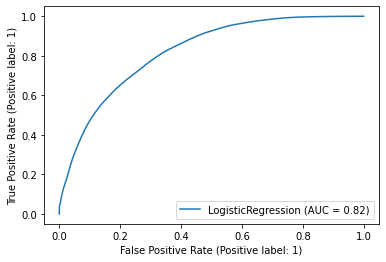

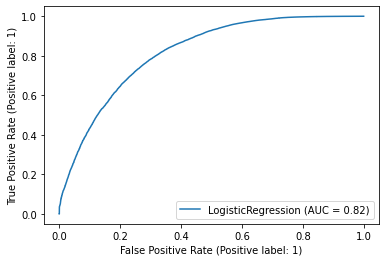

In [41]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR1, X_train, y_train)
print(LR1.score(X_train, y_train))
plot_roc_curve(LR1, X_test, y_test)
print(LR1.score(X_test, y_test))

In [ ]:
plot_roc_curve(DT1, X_train, y_train)
print(DT1.score(X_train, y_train))
plot_roc_curve(DT1, X_test, y_test)
print(DT1.score(X_test, y_test))

0.999391902375802
0.8655331806800916


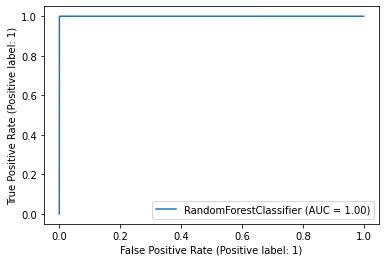

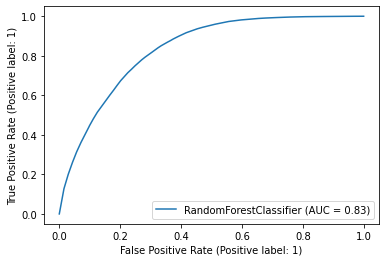

In [45]:
plot_roc_curve(RF1, X_train, y_train)
print(RF1.score(X_train, y_train))
plot_roc_curve(RF1, X_test, y_test)
print(RF1.score(X_test, y_test))

0.8379436944954045
0.8614136831517901


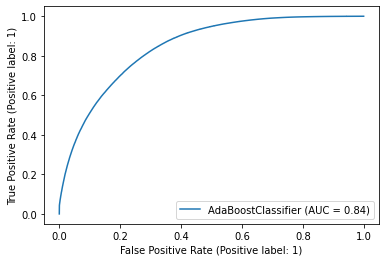

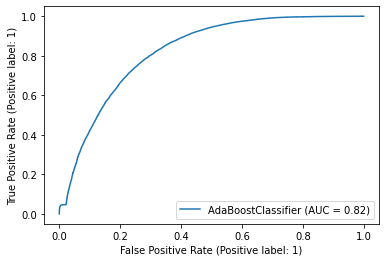

In [46]:
plot_roc_curve(BDT2, X_train, y_train)
print(BDT2.score(X_train, y_train))
plot_roc_curve(BDT2, X_test, y_test)
print(BDT2.score(X_test, y_test))

In [ ]:
# plot_roc_curve(SVM1, X_train, y_train)
# print(SVM1.score(X_train, y_train))
# plot_roc_curve(BDT1, X_test, y_test)
# print(SVM1.score(X_test, y_test))

In [ ]:
list(X.columns)

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.xticks(rotation=90)
plt.bar(list(X_train.columns), LR1.coef_[0])

In [ ]:
print(RF1.feature_importances_)

plt.figure(figsize=(10, 6), dpi=100)
plt.xticks(rotation=90)
plt.bar(list(X_train.columns), RF1.feature_importances_)

In [ ]:
print(DT1.feature_importances_)

plt.figure(figsize=(10, 6), dpi=100)
plt.xticks(rotation=90)
plt.bar(list(X_train.columns), BDT2.feature_importances_)

In [ ]:
df3_mean.corr()["action_taken_1"]